## Phase 1

### Header
#### Course Name: Data Intensive Computing
#### phase #: 1
#### term project name: Book Recommendation System

Recommendation systems have been used in various large platforms like e-commerce, entertainment. Online Book recommendations have also been implemented by a few public domains to give customers a more personalized experience. But there are a few setbacks such as recommending genres which are not relevant to user. Our project would be a system that recommends additional books based on previous reads, similar genre, author and publisher. These systems can help companies increase sales and thus improve overall profits. Our main goal is to recommend the best books pertinent to the user.



#### 2. Name of your data:

Book Ratings

#### 3. Background:
   + Source: BookCrossing (http://www2.informatik.uni-freiburg.de/~cziegler/BX/)
   + Time Period: 1800 - 2050
   + Scope (if there is please specified): Global
   + Data Unit: Global
   + Other:

#### 4 Introduction of dataset
Answer 2 questions:
+ How many columns? Show all the column labels. ((You can use pandas.DataFrame.columns to easily show all the labels of columns.)
+ What are they refering to respectively? please write in table form (markdown syntax for drawing tables : [markdown tutorial with examples](https://guides.github.com/features/mastering-markdown/))

*We have merged 3 tables which are Books, Users and Ratings into a dataframe for our usability*

In [ ]:
print("List of columns:")
list(df.columns.values)

                                                <<<< ---- Column Labels and their description ---- >>>>


Column Label | Description
------------ | -------------
User-ID | Unique identifier of a user
ISBN | Shows ISBN number of each book
Book-Rating | It has values of ratings given by user
Location | Shows user's location details like city, country
Age | User's age
Book-Title | Shows book title
Book-Author | Name of the book author
Year-Of-Publication | Year in which book was published
Publisher | Information about the publisher


#### 5 Hypothesis and conclusion
We plan on designing a system which is suitable to avid readers of various genres, age, demographics to name a few.


#### 6 Write codes to load the data 
(recommend: pandas package: 10 mins tutorial: [10 mins tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#min) )

In [ ]:
pip install pycountry-convert

  Using cached https://files.pythonhosted.org/packages/9b/e7/26c14899a43c34e04a58e3772007afe79dbd64fac15d2fbaeedff24082f2/pycountry_convert-0.7.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e3/1a/6affecd2344efee7f2487fac82242474cbac09f9e04929da5944907baf11/pytest_cov-2.11.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/73/6f1a412f14f68c273feea29a6ea9b9f1e268177d32e0e69ad6790d306312/pycountry-20.7.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/4e/d1/e4ed95fdd3ef13b78630280d9e9e240aeb65cc7c544ec57106149c3942fb/pprintpp-0.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1d/ba/8bf763e2f300c1eba8f07506efd87a3c1c346e751d4dc618c444924b7c22/pytest_mock-3.5.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b0/30/6cc0c95f0b59ad4b3b9163bff7cdcf793cc96fac64cf398ff26271f5cf5e/repoze.lru-0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/e0/

In [ ]:
import numpy as np
import pandas as pd
# import pycountry as pc
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import warnings
from difflib import SequenceMatcher
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

books = pd.read_csv("/content/drive/MyDrive/Data/Books.csv", sep = ';', error_bad_lines= False, encoding = "latin_1")
ratings = pd.read_csv("/content/drive/MyDrive/Data/Book_Ratings.csv",sep = ';', error_bad_lines= False, encoding = "latin_1")
users = pd.read_csv("/content/drive/MyDrive/Data/Users.csv", sep = ';', error_bad_lines= False, encoding = "latin_1")

Mounted at /content/drive


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


#### 7 IDA (Initial Data Analysis) 
[reference to do IDA](https://www.sciencedirect.com/science/article/pii/S0022522315017948)  \\
Please specify what you've done (text and code) for each operation (at least 10 operations). If some steps will produce a picture, please show this picture


In [ ]:
df.describe()

NameError: ignored

#### 1 Dropping Columns

*Image columns dropped as not required*


In [ ]:
books = books.drop(["Image-URL-S","Image-URL-M","Image-URL-L"],axis =1)

#### 2  Finding Duplicates and removing them

*Finding duplicates in Book-Title and removing them*

In [ ]:
# List with duplicates for book-title column
a_list = list(books['Book-Title'])

# Convert to set
a_set = set(a_list)

# Check duplicates
contains_duplicates = len(a_list) != len(a_set)
print(contains_duplicates, len(a_set), len(a_list))

print("Length of books before removing duplicates", books.shape)
# Remove duplicates
books.drop_duplicates("Book-Title", inplace=True)
print("Length of books after removing duplicates", books.shape)


True 242135 271360
Length of books before removing duplicates (271360, 5)
Length of books after removing duplicates (242135, 5)


#### 3  Merging Tables

*Merged columns to access the data from single source. Also created a dataframe to user its functions*

In [ ]:
data = pd.merge(ratings, users, on = 'User-ID', how = 'inner')

In [ ]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.describe()

,User-ID,Book-Rating,Age
count,883079.000000,883079.000000,646933.000000
mean,140001.288996,2.832366,37.307862
std,80927.312913,3.850714,14.060260
min,2.000000,0.000000,0.000000
25%,69697.000000,0.000000,28.000000
50%,140069.000000,0.000000,35.000000
75%,211351.000000,7.000000,45.000000
max,278854.000000,10.000000,244.000000


#### 4 Finding Null values

*Searched null values in data frame*

In [ ]:
print('Missing data [%]')
round(df.isnull().sum())

Missing data [%]


User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    236146
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   1
dtype: int64

#### 5 Changing Data Types


*Converted data types of 'Age' and 'Year-Of-Publication' columns from object to float in order to process the data.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883079 entries, 0 to 883078
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              883079 non-null  int64  
 1   ISBN                 883079 non-null  object 
 2   Book-Rating          883079 non-null  int64  
 3   Location             883079 non-null  object 
 4   Age                  646933 non-null  float64
 5   Book-Title           883079 non-null  object 
 6   Book-Author          883078 non-null  object 
 7   Year-Of-Publication  883079 non-null  object 
 8   Publisher            883078 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 67.4+ MB


In [ ]:
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], 'coerce')
df['Age'] = df['Age'] = pd.to_numeric(df['Age'], 'coerce')

In [ ]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], 'coerce')
users['Age'] = users['Age'] = pd.to_numeric(users['Age'], 'coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883079 entries, 0 to 883078
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              883079 non-null  int64  
 1   ISBN                 883079 non-null  object 
 2   Book-Rating          883079 non-null  int64  
 3   Location             883079 non-null  object 
 4   Age                  646933 non-null  float64
 5   Book-Title           883079 non-null  object 
 6   Book-Author          883078 non-null  object 
 7   Year-Of-Publication  883075 non-null  float64
 8   Publisher            883078 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 67.4+ MB


#### 6 Handling Null Values

*Replaced null values to some default values. For Year-Of-Publication, we set the default by taking the max value present in the column.*

In [ ]:
df['Age'] = df['Age'].fillna(0, downcast = 'infer')
df['Book-Author'] = df['Book-Author'].fillna('Unknown')
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Year-Of-Publication'] = df['Year-Of-Publication'].fillna(2050, downcast = 'infer')

In [ ]:
users['Age'] = users['Age'].fillna(0, downcast = 'infer')
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(2050, downcast = 'infer')

In [ ]:
print('Missing data after handling null data [%]')
round(df.isnull().sum())

Missing data after handling null data [%]


User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#### 7 Visualization of data

(array([2.37623e+05, 2.58900e+03, 5.30200e+03, 2.23820e+04, 5.72950e+04,
        1.05729e+05, 1.19320e+05, 9.07200e+04, 5.38100e+04, 6.48880e+04,
        5.35620e+04, 3.55000e+04, 1.91040e+04, 8.26700e+03, 2.70100e+03,
        8.05000e+02, 5.27000e+02, 1.81000e+02, 8.30000e+01, 1.48000e+02,
        2.00000e+02, 5.89000e+02, 6.00000e+00, 7.96000e+02, 1.00000e+00,
        3.00000e+00, 9.00000e+00, 8.40000e+01, 3.60000e+01, 4.00000e+00,
        1.05000e+02, 7.00000e+00, 1.00000e+00, 0.00000e+00, 2.10000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        9.00000e+00, 4.60000e+02, 2.00000e+01, 0.00000e+00, 4.00000e+00,
        1.70000e+01, 6.10000e+01, 0.00000e+00, 1.03000e+02, 7.00000e+00]),
 array([  0.  ,   4.88,   9.76,  14.64,  19.52,  24.4 ,  29.28,  34.16,
         39.04,  43.92,  48.8 ,  53.68,  58.56,  63.44,  68.32,  73.2 ,
         78.08,  82.96,  87.84,  92.72,  97.6 , 102.48, 107.36, 112.24,
        117.12, 122.  , 126.88, 131.76, 136.64, 141.

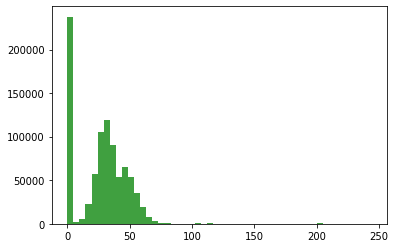

In [ ]:
plt.hist(df['Age'], 50, facecolor='g', alpha = 0.75)

(array([1.14000e+03, 2.90200e+03, 1.40390e+04, 7.85780e+04, 3.62819e+05,
        4.11407e+05, 1.00000e+01, 1.30000e+01, 4.00000e+01, 1.10000e+01]),
 array([1945. , 1955.5, 1966. , 1976.5, 1987. , 1997.5, 2008. , 2018.5,
        2029. , 2039.5, 2050. ]),
 <a list of 10 Patch objects>)

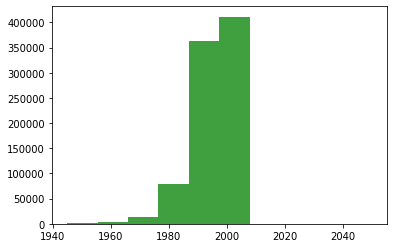

In [ ]:
plt.hist(df['Year-Of-Publication'], range=[1945, 2050], facecolor='g', alpha = 0.75)

#### 8 Number of Outliers

*Calculating the outliers present in columns.*

In [ ]:
age_df = df[(df["Age"] > 90) | (df["Age"] < 5)]
age_count = age_df.count()
print("Number of outliers in Age column:", age_count ['Age'])

Number of outliers in Age column: 240361


In [ ]:
year_df = df[(df['Year-Of-Publication'] > pd.datetime.now().year) | (df['Year-Of-Publication'] < 1800)]
year_count = year_df.count()
print("Number of  outliers in Year-Of-Publication column:", year_count ['Year-Of-Publication'])

Number of  outliers in Year-Of-Publication column: 11684


#### 9 Handling outliers

*Replaced values to None based on the condition and assigned randomly generetaed values with implementation of seed to retain the generated random data.*

In [ ]:
df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [ ]:
#Replaced the values of Age column which are over 90 or below 5 to None
df['Age'] = np.where((df["Age"] > 90) | (df["Age"] < 5), None, df['Age'])

In [ ]:
#Random value generated for Age between 10-70
is_null = df["Age"].isnull().sum()
np.random.seed(100)
rand_age = np.random.randint(10, 70, size = is_null)
age_slice = df["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
df["Age"] = age_slice

In [ ]:
users['Age'] = np.where((users["Age"] > 90) | (users["Age"] < 5), None, users['Age'])
is_null = users["Age"].isnull().sum()
np.random.seed(100)
rand_age = np.random.randint(10, 70, size = is_null)
age_slice = users["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
users["Age"] = age_slice

year_df = (books['Year-Of-Publication'] > pd.datetime.now().year) | (books['Year-Of-Publication'] < 1800)
books['Year-Of-Publication'] = np.where(year_df, None, books['Year-Of-Publication'])
is_null = books['Year-Of-Publication'].isnull().sum()
np.random.seed(50)
rand_year = np.random.randint(1800,pd.datetime.now().year , size = is_null)
year_slice = books['Year-Of-Publication'].copy()
year_slice[pd.isnull(year_slice)] = rand_year
books['Year-Of-Publication'] = year_slice

In [ ]:
# Replaced the values of Year-Of-Publication column which are greater than current year or below min year available in the data to None 
year_df = (df['Year-Of-Publication'] > pd.datetime.now().year) | (df['Year-Of-Publication'] < 1800)
df['Year-Of-Publication'] = np.where(year_df, None, df['Year-Of-Publication'])

In [ ]:
#Random value generated for Year-Of-Publication between current year- min year available in column.
is_null = df['Year-Of-Publication'].isnull().sum()
np.random.seed(50)
rand_year = np.random.randint(1800,pd.datetime.now().year , size = is_null)
year_slice = df['Year-Of-Publication'].copy()
year_slice[pd.isnull(year_slice)] = rand_year
df['Year-Of-Publication'] = year_slice

In [ ]:
df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",18,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",13,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


#### 10 Extracting Features

*Create a Country column using existing Location column in the data frame*

In [ ]:
df['Country'] = data['Location'].apply(lambda row: str(row).split(',')[-1])
#Formatting column
df['Country'] = df['Country'].str.strip()
df['Country'] = df['Country'].str.upper()

In [ ]:
df = df.drop(['Location'], axis=1)

KeyError: ignored

#### 11 Removing Special Characters

In [ ]:
#Remove special characters available in columns

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "Δ","Γ","Λ","Ω","Φ","Π","Ψ","Σ","Θ","Ξ","℧","∇","©","¼","≪","«","¶","Ã",""]
for char in spec_chars:
    # df["Country"] = df["Country"].str.replace(char, ' ')
    df['Book-Title'] = df['Book-Title'].str.replace(char, ' ')
    df['Book-Author'] = df['Book-Author'].str.replace(char, ' ')
    df['Publisher'] = df['Publisher'].str.replace(char, ' ')

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "Δ","Γ","Λ","Ω","Φ","Π","Ψ","Σ","Θ","Ξ","℧","∇","©","¼","≪","«","¶","Ã",""]
for char in spec_chars:
    # df["Country"] = df["Country"].str.replace(char, ' ')
    books['Book-Title'] = books['Book-Title'].str.replace(char, ' ')
    books['Book-Author'] = books['Book-Author'].str.replace(char, ' ')
    books['Publisher'] = books['Publisher'].str.replace(char, ' ')

#### 12 Validation of Country column

In [ ]:
df['Country'] = df['Country'].astype('str') 

In [ ]:
locs = list(df['Country'])

In [ ]:
df['Country'].unique()

array(['USA', 'Unknown', 'MALAYSIA', 'CROATIA', 'CANADA', 'BRAZIL',
       'UNITED KINGDOM', 'nan', 'CYPRUS', 'PORTUGAL', 'DENMARK',
       'GERMANY', 'SPAIN', 'NETHERLANDS', 'AUSTRALIA', 'JAPAN', 'AUSTRIA',
       'ROMANIA', 'CHINA', 'ITALY', 'SWITZERLAND', 'NEW ZEALAND',
       'BERMUDA', 'SAUDI ARABIA', 'FRANCE', 'MEXICO', 'PHILIPPINES',
       'SRI LANKA', 'SWEDEN', 'ANTARCTICA', 'FINLAND', 'IRAN', 'ISRAEL',
       'SINGAPORE', 'US', 'ARGENTINA', 'DOMINICAN REPUBLIC',
       'SOUTH KOREA', 'INDIA', 'IRELAND', 'GREECE', 'LUXEMBOURG', 'GHANA',
       'SLOVENIA', 'NZ', 'POLAND', 'BELGIUM', 'BULGARIA', 'SOUTH AFRICA',
       'TAJIKISTAN', 'CZECH REPUBLIC', 'QATAR', 'GRENADA', 'CHILE',
       'COSTA RICA', 'HONG KONG', 'KUWAIT', 'TURKEY', 'NORWAY', 'PERU',
       'TRINIDAD AND TOBAGO', 'BELIZE', 'INDONESIA', 'PAKISTAN', 'TAIWAN',
       'BURKINA FASO', 'RWANDA', 'LATVIA', 'NEPAL', 'VENEZUELA',
       'UNITED STATES', 'SLOVAKIA', 'BOSNIA AND HERZEGOVINA', 'KENYA',
       'MAURITIUS', 'NI

In [ ]:
def country_name_check():
  clst = list(pc.countries)
  alpha_2 = []
  alpha_3 = []
  name = []
  common_name =[]
  official_name = []
  invalid_countrynames = []
  counter = 0
  notobe_deleted = ['IRAN', 'SOUTH KOREA', 'NORTH KOREA', 'MACAU','REPUBLIC OF IRELAND' 'SUDAN']
  for i in clst:
    alpha_2.append(i.alpha_2)
    alpha_3.append(i.alpha_3)
    name.append(i.name)
    if hasattr(i, 'common_name'):
      common_name.append(i.common_name)
    else:
      common_name.append("")
    if hasattr(i, 'official_name'):
      official_name.append(i.official_name)
    else:
      official_name.append("")
  for j in locs:
    if j not in map(str.upper,alpha_2) and j not in map(str.upper,alpha_3) and j not in map(str.upper,name) and j not in map(str.upper,common_name) and j not in map(str.upper,official_name):
      invalid_countrynames.append(j)
  invalid_countrynames = list(set(invalid_countrynames))
  invalid_countrynames = [item for item in invalid_countrynames if item not in notobe_deleted]
  return invalid_countrynames

In [ ]:
loc_invalid = country_name_check()
print("Invalid countries:", loc_invalid)

Invalid countries: ['MORGAN', 'QUIT', 'TOBAGO', 'ORANGE CO', 'ST. HELENA', 'LAOS', 'CATALUNYA', 'CSA', 'POLK', 'UNITED SATES', 'THAILAND"', 'FAR AWAY...', 'SOUTH KOREA"', 'OURANOS', 'PETROLWAR NATION', 'SHELBY', 'BURMA', 'U.S>', 'KERN', 'HERNANDO', 'PHILLIPINES', 'UNKNOWN', 'HERE AND THERE', 'PHILIPPINES"', 'GERMANY"', 'L`ITALIA', 'BRUNEI', 'FORT BEND', 'PORTUGAL"', 'RICHMOND COUNTRY', 'SPAIN"', 'U.K.', 'GALIZA NEGHRA', 'X', 'ENGLAND', 'CARIBBEAN SEA', 'SPACE', 'U.S. OF A.', 'YSA', 'AROOSTOOK', 'CATALONIA', 'THE GREAT WHITE NORTH', 'NETHERLANDS"', 'UNITED KINDGONM', 'C.A.', '\\"N/A\\""', 'ORENSE', 'GALIZA', 'THE WORLD TOMORROW', 'CHEROKEE', 'UNITED STATE', 'CANANDA', 'LA FRANCE', 'USA & CANADA', 'UNITED KINGDOM"', 'MADRID', 'MACEDONIA', 'DISGRUNTLED STATES OF AMERICA', 'SCOTLAND', 'U.S.A.', 'BURLINGTON', 'AMERICA', 'SWITZERLAND"', 'ITALIA', 'YUGOSLAVIA', 'CHINA"', 'NEW ZEALAND"', 'CAMDEN', 'LA BELGIQUE', 'ITALY"', 'CHANNEL ISLANDS', 'SYRIA', 'UNIVERSE', 'FINLAND"', 'LA CHINE ÉTERNELLE!

In [ ]:
def replaceInvalidCountries(x):
    if x in  loc_invalid:
        return np.NaN
    else:
        return x

In [ ]:
#Replace invalid countries with NaN
df['Country'] = df['Country'].apply(lambda x : replaceInvalidCountries(x))

In [ ]:
def removeEmptyStrings(x):
    if (len(x) == 0):
      return np.NaN
    else:
      return x

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883079 entries, 0 to 883078
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              883079 non-null  int64 
 1   ISBN                 883079 non-null  object
 2   Book-Rating          883079 non-null  int64 
 3   Age                  883079 non-null  object
 4   Book-Title           883079 non-null  object
 5   Book-Author          883079 non-null  object
 6   Year-Of-Publication  883079 non-null  object
 7   Publisher            883079 non-null  object
 8   Country              851857 non-null  object
dtypes: int64(2), object(7)
memory usage: 67.4+ MB


In [ ]:
#Replace empty fields with NaN
df['Country'] = df['Country'].apply(lambda x : removeEmptyStrings(x))
# df['Country'] = df['Country'].apply(lambda x : (len(x) == 0))

In [ ]:
# Fill NaN with Unknown
df['Country'] = df['Country'].fillna(value = 'Unknown', inplace=True)

In [ ]:
df['Country'].unique()

array([None], dtype=object)

In [ ]:
df.sort_values(by='Book-Title')

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
743447,102967,1568580010,0,54,A Novel,Michael Brodsky,1994,Pub Group West,USA
880760,271245,1565920465,0,41,A Nutshell handbook,Donnalyn Frey,1994,O Reilly,USA
771839,127233,0743415183,0,29,And for Starters,Victoria Routledge,2001,Simon amp Schuster Trade Division,USA
785932,140080,3499108682,9,35,steigen aus maschine brennt 10 Flieg...,Roald Dahl,1966,Rowohlt Tb,GERMANY
602351,37950,2890452107,0,48,vol bord du Concordia Her Les A...,Madeleine Gaudreault Labrecque,1979,ditions Hurtubise HMH,CANADA
...,...,...,...,...,...,...,...,...,...
430169,11676,8495501104,0,24,Â¿Qu me quieres amor,Manuel Rivas,2001,Santillana USA Publishing Company,nan
430177,260254,8495501104,7,35,Â¿Qu me quieres amor,Manuel Rivas,2001,Santillana USA Publishing Company,SPAIN
430172,108726,8495501104,0,29,Â¿Qu me quieres amor,Manuel Rivas,2001,Santillana USA Publishing Company,SPAIN
350701,219781,8479533382,8,29,Â¿Qui n se ha llevado mi queso,Spencer Johnson,1999,Ediciones Urano,SPAIN


#### 13 Demographics of the Data

In [ ]:
df.groupby(["Country"])['Book-Rating'].count().sort_values(ascending=False).head(10)

Country
USA               635218
CANADA             79174
UNITED KINGDOM     28598
GERMANY            25646
                   20571
AUSTRALIA          15619
SPAIN              13612
Unknown            10651
FRANCE              9873
PORTUGAL            6083
Name: Book-Rating, dtype: int64

8. (option)Remeber to save your dataSet after processing for future usage:


In [ ]:
df.to_csv(r'/content/drive/MyDrive/Data/Updated_Cleaned_Data.csv', index = False)

In [ ]:
books.to_csv(r'/content/drive/MyDrive/Data/Cleaned_Books.csv', index = False)
users.to_csv(r'/content/drive/MyDrive/Data/Cleaned_Users.csv', index = False)
ratings.to_csv(r'/content/drive/MyDrive/Data/Cleaned_Ratings.csv', index = False)


### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <Jiayi_person1ubname_person2ubname.zip> or <Ping_person1ubname_person2ubname.zip> or <Chen_person1ubname_person2ubname.zip> depended on which TA you have choosed. 
5. upload your zip file to timberlake server.

### Grading:
    0 – no submission by deadline
    15 – completed submission with all the requirements
    10 – there are missing items, or unsatisfactory in some respects
    5 – submission present but many required items missing or code not working
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.


### Example Answer
(I am using the dataset from https://www.kaggle.com/gpreda/covid-world-vaccination-progress to provide a sample answer )
1. Source of Data: https://ourworldindata.org/
2. Give a name to your dataset: COVID-19 WVP (World Vaccination Progress)
3. Background:
   + Data were collected by Our World in Data
   + Time Period: 2020-2021
   + Scope (if there is please specified): Global
   + Data Unit: Individual country


4. Introduction of dataset: Answer 2 questions:
+ How many columns? Show all the column labels. ((You can use pandas.DataFrame.columns to easily show all the labels of columns.)
+ What are they refering to respectively? please write in table form (markdown syntax for drawing tables : [markdown tutorial with examples](https://guides.github.com/features/mastering-markdown/))

|Column label|description|
|-|-|
| Country | this is the country for which the vaccination information is provided |
| Country ISO Code | ISO code for the country|
|Date | date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total|
|Total number of vaccinations| this is the absolute number of total immunizations in the country |
|Total number of people vaccinated| a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people|
|Total number of people fully vaccinated| the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme|
|Daily vaccinations (raw) | for a certain data entry, the number of vaccination for that date/country|
|Daily vaccinations | for a certain data entry, the number of vaccination for that date/country|
|Total vaccinations per hundred| ratio (in percent) between vaccination number and total population up to the date in the country|
|Total number of people vaccinated per hundred | ratio (in percent) between population immunized and total population up to the date in the country|
|Total number of people fully vaccinated per hundred |ratio (in percent) between population fully immunized and total population up to the date in the country|
|Number of vaccinations per day | number of daily vaccination for that day and country|
|Daily vaccinations per million | ratio (in ppm) between vaccination number and total population for the current date in the country|
|Vaccines used in the country | total number of vaccines used in the country (up to date)|
|Source name | source of the information (national authority, international organization, local organization etc.)|
|Source website | website of the source of information|

5. What hypothesis or conclusion do you want to study from the data?  (Remember this relative to your future phases of task)\\
The relation between time with respect to increaseing of vaccinated people per day is decreasing negative exponetially (You don't need to be too specific on the hypothesis, something vague is fine. But the hypothesis mustn't be too obvious to analysis, e.g. find the country with largest vaccinated people ). \\

6. Write codes to load the data (recommend: pandas package) save your data in your google drive "./data" folder

In [ ]:
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/data/test.csv")

FileNotFoundError: ignored

7. IDA (Initial Data Analysis)

Statement: I want to take a look at the brief description of data



```
df.describe()
```


8. (option)Remeber to save your dataSet after processing for future usage:


In [ ]:
df.to_csv(index=False) # for example

In [ ]:
liked = pd.merge(users, df, on='User-ID', how='inner')
